In [1]:
import json
import os
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import tarfile
import pickle
import numpy as np
from tqdm import tqdm
import cv2
from PIL import Image

path = "tsinghuaDaimlerDataset"

In [67]:
#extract images or labels
# open file
file = tarfile.open('tsinghuaDaimlerDataset/tdcb_leftImg8bit_train.tar.gz')
# extracting file
file.extractall('tsinghuaDaimlerDataset/images_full/test/')
file.close()

KeyboardInterrupt: 

In [69]:
# create bbox from label
def create_bbox(path) : 
    for _, _, fnames in sorted(os.walk(path+"/label/labelData/train/tsinghuaDaimlerDataset/")): #for each folder
        for fname in fnames[1500:2000] :
            with open("tsinghuaDaimlerDataset/label/labelData/train/tsinghuaDaimlerDataset/"+fname) as json_file:
                im = json.load(json_file)
            bbox = {"y": im["children"][0]["minrow"], "x": im["children"][0]["mincol"], "w": (im["children"][0]["maxcol"]), "h": im["children"][0]["maxrow"]}
            with open(path +"/images_aligned/bbox/test/"+ os.path.splitext(im["imagename"])[0]+".json", "w") as outfile:
                json.dump(bbox, outfile)
create_bbox(path)

tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png


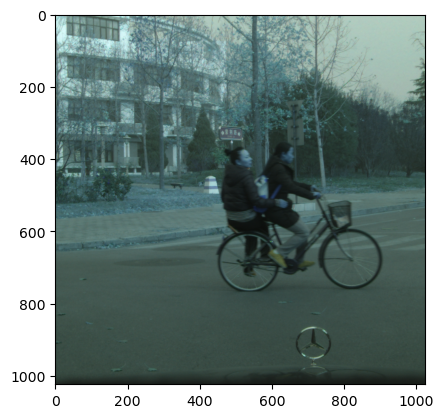

In [9]:
#crop image and modify bbox

for _, _, fnames in sorted(os.walk(path + "/images_new/images/train/real/")): #for each folder
    for fname in fnames :
        print(fname)
        AB = Image.open("tsinghuaDaimlerDataset/images_new/images/train/real/"+ fname).convert('RGB')
        width, height = AB.size
        left = int((width - height) / 2)
        right = left + height
        im1 = AB.crop((left, 0, right, height))
        im1.save("tsinghuaDaimlerDataset/images_new/images/train/real/"+ fname)
        AB = cv2.imread("tsinghuaDaimlerDataset/images_new/images/train/real/"+fname,1)
        plt.imshow(AB)

        with open("tsinghuaDaimlerDataset/images_new/bbox/test/"+ os.path.splitext(fname)[0] + ".json" ) as json_file:
            bbox = json.load(json_file)

        bbox2 = {"y": bbox["y"], "x": bbox["x"]-left, "w": bbox["w"]-left, "h": bbox["h"]}
        if bbox2["x"]>= 1024 and bbox2["w"] >= 1024 :
            bbox2["x"] = 1024
            bbox2["w"] = 1024 
        if bbox2["x"]<= 1024 and bbox2["w"] > 1024 :
            bbox2["w"] = 1024 
        if bbox2["x"] <0 :
            bbox2["x"] =0
        if bbox2["w"] <0 :
            bbox2["w"] =0
        #with open("tsinghuaDaimlerDataset/images_new/bbox/test/"+ os.path.splitext(fname)[0] +".json", "w") as outfile:
            #json.dump(bbox2, outfile)

In [72]:
#select only cyclist large enought
for _, _, fnames in sorted(os.walk(path + "/images_aligned_crop/images/test/")): #for each folder
    for fname in fnames[0:1000]:

        with open("tsinghuaDaimlerDataset/images_aligned_crop/bbox/test/"+ os.path.splitext(fname)[0] + ".json" ) as json_file:
            bbox = json.load(json_file)
        h = 512
        w_total = 512*2
        size_y = 1024
        size_x = 1024 *2
        size_bbox = [int(bbox["h"]*h/size_y)-int(bbox["y"]*h/size_y), int(bbox["w"]*w_total/size_x)-int(bbox["x"]*w_total/size_x)] 

        if size_bbox[0]<48 or size_bbox[1]<48 :
            print(size_bbox)
            os.remove("tsinghuaDaimlerDataset/images_aligned_crop/bbox/test/"+ os.path.splitext(fname)[0] + ".json")
            os.remove(path + "/images_aligned_crop/images/test/"+ fname)



[51, 17]
[51, 18]
[62, 22]
[66, 26]
[38, 15]
[39, 15]
[40, 16]
[41, 16]
[40, 16]
[40, 15]
[40, 14]
[41, 16]
[43, 17]
[49, 18]
[52, 20]
[57, 23]
[63, 25]
[69, 25]
[78, 29]
[102, 21]
[122, 0]
[63, 0]
[95, 23]
[263, 0]
[288, 0]
[31, 13]
[34, 12]
[44, 17]
[49, 21]
[55, 21]
[62, 25]
[42, 16]
[51, 20]
[92, 35]
[85, 39]
[124, 27]
[151, 0]
[40, 0]
[45, 25]
[62, 25]
[78, 30]
[43, 28]
[42, 21]
[54, 21]
[87, 31]
[234, 0]
[72, 34]
[62, 33]
[73, 46]
[93, 43]
[31, 0]
[34, 14]
[39, 16]
[45, 18]
[93, 0]
[43, 19]
[51, 22]
[61, 28]
[74, 2]
[47, 24]
[72, 39]
[57, 6]
[90, 45]
[55, 24]
[70, 34]
[126, 0]
[204, 0]
[258, 0]
[33, 15]
[47, 16]
[38, 18]
[41, 16]
[62, 22]
[48, 19]
[53, 21]
[127, 0]
[175, 0]
[44, 45]
[58, 36]
[69, 0]
[40, 16]
[56, 20]
[84, 0]
[54, 22]
[75, 29]
[91, 35]
[49, 0]
[51, 19]
[78, 0]
[87, 0]
[98, 0]
[70, 24]
[76, 27]
[84, 30]
[96, 32]
[110, 37]
[128, 43]
[38, 14]
[37, 0]
[39, 0]
[38, 0]
[37, 0]
[37, 15]
[40, 15]
[41, 15]
[43, 16]
[45, 17]
[48, 18]
[50, 19]
[53, 20]
[55, 22]
[59, 23]
[65,

In [23]:
with open("tsinghuaDaimlerDataset/images_aligned_crop/bbox/train/tsinghuaDaimlerDataset_2014-11-20_074640_000001490_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
    print(bbox)
h = 286
w_total = 286*2
size_y = 1024
size_x = 1024 *2
size_bbox = [int(bbox["h"]*h/size_y)-int(bbox["y"]*h/size_y), int(bbox["w"]*w_total/size_x)-int(bbox["x"]*w_total/size_x)]
print(size_bbox) 


{'y': 376, 'x': 1012, 'w': 1097, 'h': 605}
[63, 24]


(1024, 4096, 3)


FileNotFoundError: [Errno 2] No such file or directory: 'tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.json'

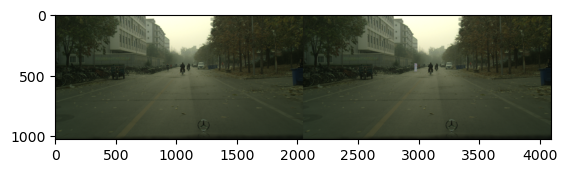

In [36]:
#add noise trials

image = mpimg.imread("tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.png")
plt.imshow(image)
print(image.shape)

with open("tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000008404_leftImg8bit.json") as json_file:
    bbox = json.load(json_file)
print(bbox)

roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
noise = np.random.randint(0, 2, roi.shape, dtype=np.uint8)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

plt.imshow(image_noise)
plt.show()

print(image.shape)


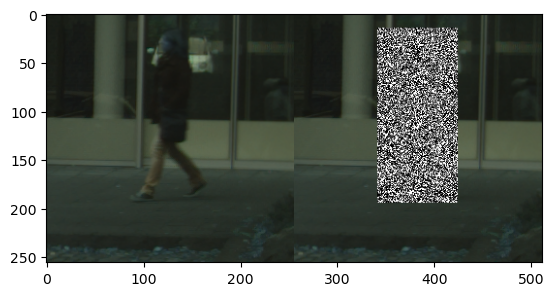

In [142]:
image = cv2.imread("1.png",1)
plt.imshow(image)

In [143]:
with open("1.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

{'y': 15, 'x': 86, 'w': 169, 'h': 195}


(180, 83, 3)
(180, 83, 3)


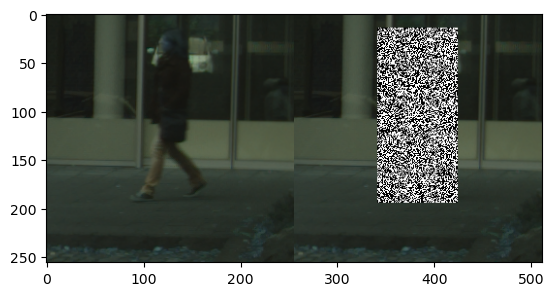

True

In [149]:
roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
print(roi.shape)
noise = np.random.randint(0, 2, size=[roi.shape[0],roi.shape[1]])
noise = np.where (noise ==1,255,0)
noise = np.repeat(noise[:, :, np.newaxis], 3, axis=2)
print(noise.shape)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]+256:bbox["w"]+256] = noise

plt.imshow(image_noise)
plt.show()




In [150]:
cv2.imwrite("tsinghuaDaimlerDataset/2.png", image_noise)

True

{'y': 356, 'x': 446, 'w': 906, 'h': 770}
99 124 253 215


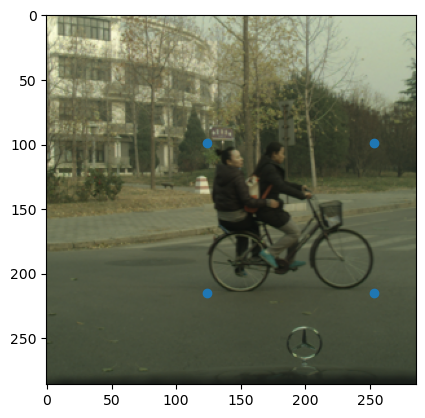

In [13]:
#resizing trials

AB = Image.open("tsinghuaDaimlerDataset/images_new/images/train/real/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png").convert('RGB')
AB = AB.resize((286, 286), Image.BICUBIC)
with open("tsinghuaDaimlerDataset/images_new/bbox/train/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

x = int((bbox["x"] * 286) /1024)
y = int((bbox["y"] * 286) /1024)
w = int(bbox["w"] * 286 /1024)
h = int(bbox["h"] * 286 /1024)

bbox2 = {"y": y, "x": x, "w": w, "h": h}

print(y,x,w,h)

plt.imshow(AB)
plt.scatter ( x = [x,x,w,w], y = [y,h,y,h])
plt.show()

with open("tsinghuaDaimlerDataset/images_new/bbox/train/"+ os.path.splitext(fname)[0] +".json", "w") as outfile:
    json.dump(bbox2, outfile)

AB.save("tsinghuaDaimlerDataset/images_new/images/train/real/"+ fname)

{'y': 99, 'x': 124, 'w': 253, 'h': 215}


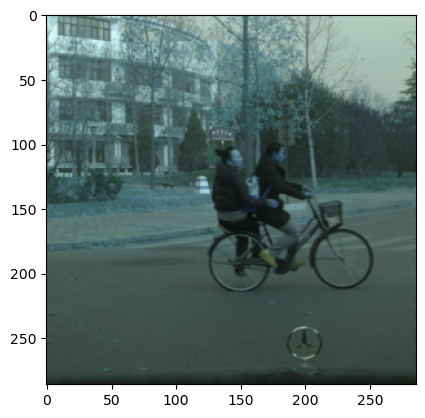

In [15]:
AB = cv2.imread("tsinghuaDaimlerDataset/images_new/images/train/real/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png",1)
plt.imshow(AB)

with open("tsinghuaDaimlerDataset/images_new/bbox/train/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

In [42]:
def select_square_around_plastic (image_path,bbox_path,image_path_save, bbox_path_save,size) :
    for _, _, fnames in sorted(os.walk(image_path)): #for each folder
        for fname in fnames[1530:1535] :
            print(fname)
            AB = Image.open(image_path+ fname).convert('RGB')
            width, height = AB.size
            with open(bbox_path+ os.path.splitext(fname)[0] + ".json" ) as json_file:
                bbox = json.load(json_file)
            size_bbox = [bbox["h"]-bbox["y"], bbox["w"]-bbox["x"]]

            while size_bbox[0] > size or size_bbox[1] > size :
                print("bbox too large")
                AB = AB.resize((int(width/2),int(height/2)), Image.BICUBIC)
                bbox = {"y": int(bbox["y"]/2), "x": int(bbox["x"]/2), "w": int(bbox["w"]/2), "h": int(bbox["h"]/2)}
                size_bbox = [bbox["h"]-bbox["y"], bbox["w"]-bbox["x"]]
                width, height = AB.size

            left = bbox["x"]+int(size_bbox[1]/2-size/2)
            top = bbox["y"]+int(size_bbox[0]/2+size/2)
            right = bbox["x"]+int(size_bbox[1]/2+size/2)
            bottom = bbox["y"]+int(size_bbox[0]/2-size/2)

            if left <0 :
                print("1")
                diff = 0-left
                left = 0
                right = right + diff
            if right > width :
                print("2")
                diff = right -width
                right = width
                left = left - diff
            if top > height :
                print("3")
                diff = top -height
                top = height
                bottom = bottom - diff
            if bottom <0 :
                print("4")
                diff = 0 - bottom
                bottom = 0
                top = top + diff
            
            print("coor",left, top,right,bottom)

            AB = AB.crop((left,bottom,right,top))

            AB.save(image_path_save+ fname)

            bbox2 = {"y": bbox["y"]-bottom, "x": bbox["x"]-left, "w": bbox["w"]-left, "h": bbox["h"]-bottom}
            print("bbox",bbox2)

            plt.imshow(AB)
            plt.scatter (x= [bbox2["x"],bbox2["x"],bbox2["w"],bbox2["w"]], y=[bbox2["y"],bbox2["h"],bbox2["y"],bbox2["h"]])
            plt.show()
            
            #with open(bbox_path_save+ os.path.splitext(fname)[0] +".json", "w") as outfile:
            #    json.dump(bbox2, outfile)

tsinghuaDaimlerDataset_2014-11-20_082922_000011432_leftImg8bit.png
bbox too large
coor 509 398 765 143
bbox {'y': 1, 'x': 84, 'w': 172, 'h': 254}


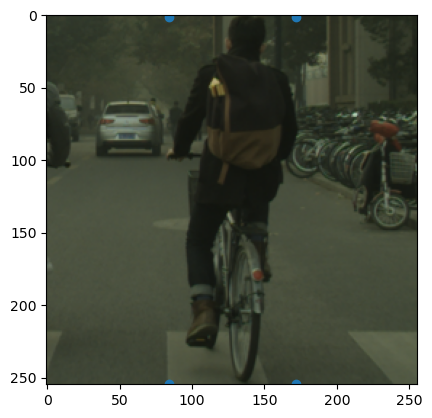

tsinghuaDaimlerDataset_2014-11-20_082922_000011442_leftImg8bit.png
bbox too large
bbox too large
3
coor 195 256 451 1
bbox {'y': 73, 'x': 106, 'w': 150, 'h': 204}


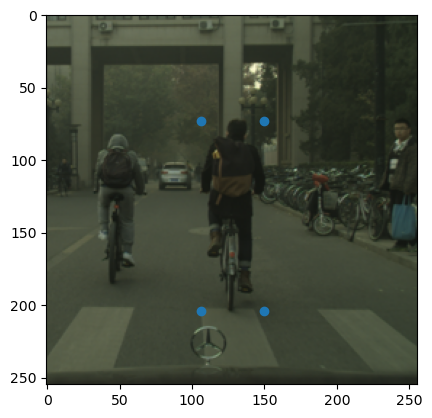

tsinghuaDaimlerDataset_2014-11-20_082922_000011452_leftImg8bit.png
bbox too large
bbox too large
3
coor 206 256 462 0
bbox {'y': 69, 'x': 105, 'w': 151, 'h': 209}


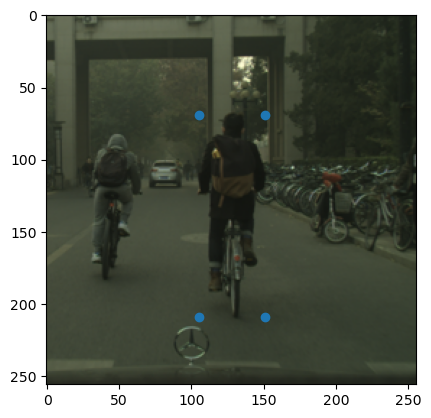

tsinghuaDaimlerDataset_2014-11-20_082922_000011462_leftImg8bit.png
bbox too large
bbox too large
3
coor 224 256 479 0
bbox {'y': 68, 'x': 102, 'w': 153, 'h': 216}


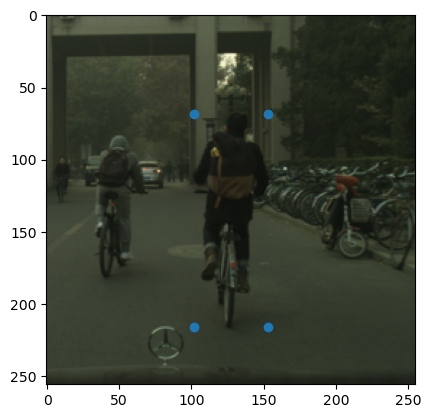

tsinghuaDaimlerDataset_2014-11-20_082922_000011472_leftImg8bit.png
bbox too large
bbox too large
3
coor 253 256 509 0
bbox {'y': 66, 'x': 102, 'w': 154, 'h': 222}


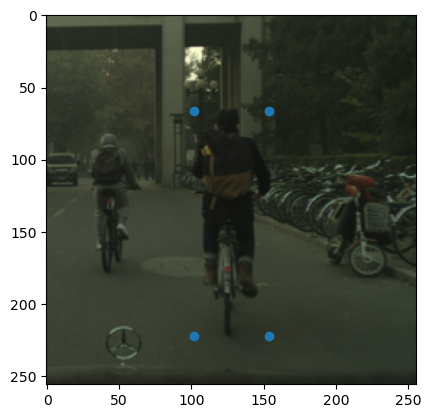

In [43]:
select_square_around_plastic ("tsinghuaDaimlerDataset/images_full/train/","tsinghuaDaimlerDataset/all_bbox/bbox/train/","tsinghuaDaimlerDataset/images_crop_bb/images/train/", "tsinghuaDaimlerDataset/images_crop_bb/bbox/train/",256)

In [98]:
def select_big_plastic (image_path,bbox_path, output_size, input_size):
    #select only plastics large enought
    for _, _, fnames in sorted(os.walk(image_path)): #for each folder
        for fname in fnames[0:50]:

            with open(bbox_path+ os.path.splitext(fname)[0] + ".json" ) as json_file:
                bbox = json.load(json_file)
            h = output_size[0]
            w_total = output_size[1]
            size_y = input_size[0]
            size_x = input_size[1]
            size_bbox = [int(bbox["h"]*h/size_y)-int(bbox["y"]*h/size_y), int(bbox["w"]*w_total/size_x)-int(bbox["x"]*w_total/size_x)] 

            if size_bbox[0]<70 or size_bbox[1]<25 : # w:25 et h:70 avec crop, mais avec 48 ca marche a voir
                print(size_bbox)
                os.remove(bbox_path+ os.path.splitext(fname)[0] + ".json")
                os.remove(image_path+ fname)

In [99]:
select_big_plastic(path + "/images_crop_bb/images/train/", "tsinghuaDaimlerDataset/images_crop_bb/bbox/train/", [256,256],[256,256])

[68, 24]
[66, 24]
[63, 23]
[62, 21]
[62, 24]
[68, 26]
[60, 21]
[62, 21]
[65, 22]
[67, 23]


[[[157 186 189]
  [194 233 239]
  [169 213 216]
  ...
  [176 204 193]
  [176 205 192]
  [179 205 192]]

 [[161 187 197]
  [197 239 235]
  [177 217 216]
  ...
  [178 203 190]
  [171 205 193]
  [177 204 192]]

 [[165 206 214]
  [184 228 221]
  [166 209 211]
  ...
  [179 203 189]
  [176 201 189]
  [175 204 190]]

 ...

 [[ 42  54  47]
  [ 42  55  48]
  [ 42  54  46]
  ...
  [ 28  35  29]
  [ 30  34  29]
  [ 28  35  29]]

 [[ 39  49  42]
  [ 38  49  42]
  [ 37  48  42]
  ...
  [ 27  33  28]
  [ 27  31  27]
  [ 27  32  28]]

 [[ 35  44  37]
  [ 34  43  37]
  [ 35  42  38]
  ...
  [ 26  31  26]
  [ 26  30  27]
  [ 26  30  26]]]
[[[ 0.23137262  0.45882362  0.48235303]
  [ 0.5215687   0.8274511   0.87450993]
  [ 0.32549027  0.6705883   0.6941177 ]
  ...
  [ 0.38039225  0.6000001   0.5137256 ]
  [ 0.38039225  0.6078432   0.50588244]
  [ 0.40392166  0.6078432   0.50588244]]

 [[ 0.26274517  0.46666676  0.5450981 ]
  [ 0.5450981   0.87450993  0.8431374 ]
  [ 0.3882354   0.70196086  0.6941177 ]
  

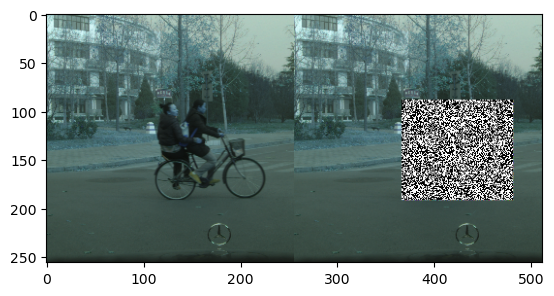

In [26]:
image = cv2.imread("/app/LSP5_compost/data_preprocessing/tsinghuaDaimlerDataset/images_aligned_one/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png",1)
plt.imshow(image)
print(image)
image = cv2.normalize(image, None,-1,1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print(image)

(256, 512, 3)
[[[ 0.48235297  0.8745098   0.69411767]
  [ 0.54509807  0.33333337  0.47450984]
  [ 0.41176474  0.22352946 -0.1607843 ]
  ...
  [ 0.4901961   0.48235297  0.4901961 ]
  [ 0.47450984  0.49803925  0.4901961 ]
  [ 0.48235297  0.48235297  0.4901961 ]]

 [[ 0.654902    0.5921569   0.79607844]
  [ 0.64705884  0.41960788  0.7647059 ]
  [ 0.58431375  0.6862745   0.06666672]
  ...
  [ 0.49803925  0.5058824   0.4901961 ]
  [ 0.49803925  0.4901961   0.48235297]
  [ 0.48235297  0.48235297  0.47450984]]

 [[ 0.5921569   0.8666667   0.62352943]
  [ 0.7647059   0.7176471   0.5137255 ]
  [ 0.7254902   0.56078434 -0.08235294]
  ...
  [ 0.48235297  0.48235297  0.4666667 ]
  [ 0.4666667   0.48235297  0.47450984]
  [ 0.47450984  0.48235297  0.48235297]]

 ...

 [[-0.5764706  -0.56078434 -0.5686275 ]
  [-0.5529412  -0.54509807 -0.5921569 ]
  [-0.5529412  -0.5372549  -0.56078434]
  ...
  [-0.6784314  -0.6862745  -0.6862745 ]
  [-0.6784314  -0.6784314  -0.67058825]
  [-0.6627451  -0.67058825 -0.

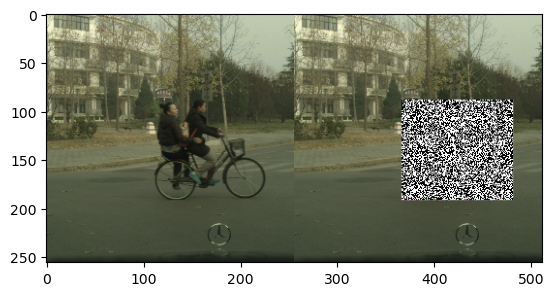

In [33]:
with open("/app/LSP5_compost/data_preprocessing/tsinghuaDaimlerDataset/images_aligned_one/bbox/train/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.json") as json_file:
    bbox = json.load(json_file)

# roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
# noise = np.random.randint(0, 2, size=[roi.shape[0],roi.shape[1]])
# noise = np.where (noise ==1,255,0)
# noise = np.repeat(noise[:, :, np.newaxis], 3, axis=2)
#norm = np.zeros((800,800))
#image = cv2.normalize(image,  norm, 0, 255, cv2.NORM_MINMAX)
#plt.imshow(image)
import torchvision.transforms as transforms
AB = Image.open("/app/LSP5_compost/data_preprocessing/tsinghuaDaimlerDataset/images_aligned_one/images/train/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png").convert('RGB')
print(np.array(AB).shape)
plt.imshow(AB)
transform_list = [transforms.ToTensor(), # convert image to tensor
                          transforms.Normalize((0.5, 0.5, 0.5),
                                               (0.5, 0.5, 0.5))] # list that holds the defined transformations. In this case, it contains the ToTensor() transformation and the Normalize() transformation.

transform = transforms.Compose(transform_list)
AB = transform(AB)
AB = AB.numpy().reshape([256,512,3])
print(AB)




#image[bbox["y"]:bbox["h"], bbox["x"]+256:bbox["w"]+256] = noise
#plt.imshow(image)

#im_path = "/app/LSP5_compost/data_preprocessing/tsinghuaDaimlerDataset/images_aligned_one/tsinghuaDaimlerDataset_2014-11-20_075523_000002241_leftImg8bit.png"
#cv2.imwrite(im_path, image)


  0%|          | 0/2 [00:00<?, ?it/s]

tsinghuaDaimlerDataset_2014-11-20_074640_000000050_leftImg8bit.png
{'y': 76, 'x': 109, 'w': 146, 'h': 179}
[103, 37]
(103, 37, 3)


100%|██████████| 2/2 [00:00<00:00,  4.59it/s]


tsinghuaDaimlerDataset_2014-11-20_074640_000000060_leftImg8bit.png
{'y': 79, 'x': 111, 'w': 145, 'h': 177}
[98, 34]
(98, 34, 3)


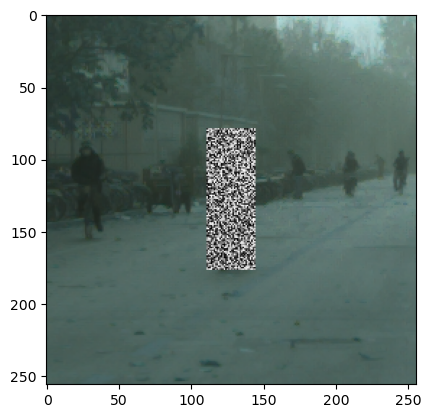

In [120]:
def replace_plastics_with_noise(path_images, path_bounding_boxes, path_save, noise_fct):
    # Iterate over the bounding boxes
    for _, _, fnames in sorted(os.walk(path_images)): 
        for fname in tqdm(fnames) :
        
            image = cv2.imread(path_images + fname,1)

            with open(path_bounding_boxes + os.path.splitext(fname)[0] + ".json" ) as json_file:
                bbox = json.load(json_file)
            
            roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 

            if (noise_fct == "b_w") :
                noise = np.random.randint(0, 2, size=[roi.shape[0],roi.shape[1]])
                noise = np.where (noise ==1,255,0)
                noise = np.repeat(noise[:, :, np.newaxis], 3, axis=2)
            if ( noise_fct =="color") :
                noise = np.random.randint(0, 256, roi.shape, dtype=np.uint8)
            if (noise_fct == "gaussian") :
                mean = 0
                var = 0.1
                sigma = var**0.5
                noise = np.random.normal(mean,sigma,roi.shape)
                noise = noise.reshape(roi.shape)*255
            if (noise_fct =="gaussian_b_w") :
                mean = 0
                var = 0.1
                sigma = var**0.5
                noise = np.random.normal(mean,sigma,[roi.shape[0],roi.shape[1]])
                noise = np.repeat(noise[:, :, np.newaxis], 3, axis=2)
                noise = noise.reshape(roi.shape)*255

            # Replace the ROI with random noise
            image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

            plt.imshow(image)

            im_path = path_save + fname
            cv2.imwrite(im_path, image)

replace_plastics_with_noise( path + "/images_crop_bb/images/train/", path + "/images_crop_bb/bbox/train/", path + "/images_crop_bb_noise/images/train/", "gaussian_b_w")